In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [87]:
proj = '52Cr'
trg = '144Sm'
cn = '196Rn'
bf = 0.5
ch = 'xn'
sigr = 2.5
# bf_diff = 0.01

In [88]:
df10_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS10' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

df0_mb = pd.read_csv('data/' + proj + '_' + trg + '_' + cn + '_' + ch + '_' + 'IFUS0' + '_barfac' + f'{bf:.2f}' + '_sigr' + str(sigr) + '.dat', sep='\t')

df10_mb.describe()

,E_lab,E*/MeV,187Rn,188Rn,189Rn,190Rn,191Rn,192Rn,193Rn,194Rn,195Rn,196Rn
count,75.00000,75.000000,75.0,75.0,7.500000e+01,7.500000e+01,7.500000e+01,7.500000e+01,7.500000e+01,7.500000e+01,7.500000e+01,75.000000
mean,264.21000,54.000000,0.0,0.0,5.934667e-19,2.565028e-14,5.170402e-12,2.425730e-11,4.818383e-09,3.313927e-09,2.340387e-10,0.298800
std,29.66474,21.794495,0.0,0.0,4.164111e-18,7.420323e-14,9.281624e-12,5.033124e-11,1.135249e-08,8.055198e-09,7.590495e-10,0.768878
min,213.84900,17.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,239.02950,35.500000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,264.21000,54.000000,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
75%,289.39050,72.500000,0.0,0.0,0.000000e+00,0.000000e+00,5.640000e-12,1.285000e-11,9.590000e-10,3.751450e-12,0.000000e+00,0.000000
max,314.57100,91.000000,0.0,0.0,3.530000e-17,3.160000e-13,3.080000e-11,1.810000e-10,4.450000e-08,3.150000e-08,3.480000e-09,2.490000


In [89]:
e_lab = [231,236,238,252]
exp_data = [[np.nan,np.nan,np.nan,3.62e-9],[np.nan,4.74e-8,np.nan,np.nan]]
exp_data=np.array(exp_data)

In [90]:
dfm10_mb = df10_mb.melt(id_vars=['E_lab','E*/MeV'], var_name='isotope', value_name='CS')
dfm0_mb = df0_mb.melt(id_vars=['E_lab','E*/MeV'], var_name='isotope', value_name='CS')

dfm10=dfm10_mb
df10=df10_mb

dfm0=dfm0_mb
df0=df0_mb

mb=1
ub=1e3
nb=1e6
pb=1e9

scale=pb

dfm10['CS']=dfm10_mb['CS']*scale
dfm0['CS']=dfm0_mb['CS']*scale
exp_data=exp_data*scale


/tmp/ipykernel_105364/1864254969.py:11: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[8:-2]))], palette=colors)
/tmp/ipykernel_105364/1864254969.py:12: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df0.columns[8:-2]))], palette=colors, ls=':', legend=None)


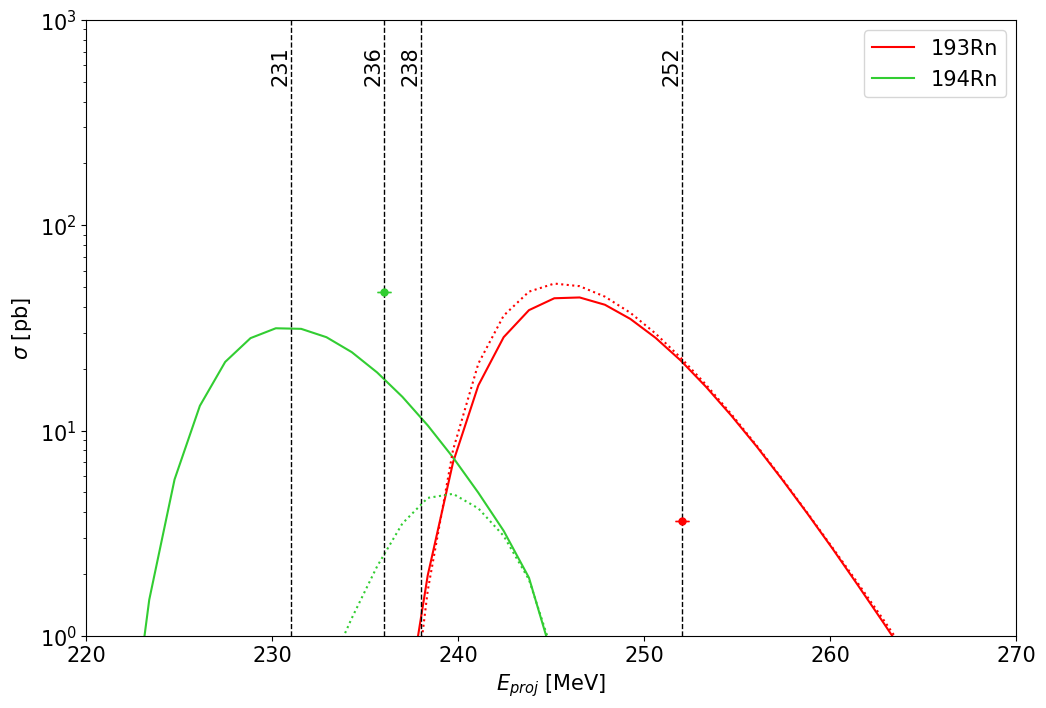

In [92]:
plt.rcParams.update({'font.size': 15})
colors = ['red', 'limegreen', 'blue', 'gold', 'black', 'turquoise', 'magenta', 'grey', 'olive', 'brown']

y_lower = 1e-0
y_upper = 1e3
x_lower = 220
x_upper = 270

fig,ax=plt.subplots(figsize=(12,8))

sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm10[dfm10['isotope'].isin(list(df10.columns[8:-2]))], palette=colors)
sns.lineplot(x='E_lab', y='CS', hue='isotope', data=dfm0[dfm0['isotope'].isin(list(df0.columns[8:-2]))], palette=colors, ls=':', legend=None)

plt.semilogy()
plt.ylim(y_lower,y_upper)
plt.xlim(x_lower,x_upper)

for energy in e_lab:
    plt.plot([energy, energy], [y_lower, y_upper], linewidth=1, color='black', linestyle='--')
    plt.text(energy-1.1, y_upper*0.5, str(energy), rotation=90)
    
for i in range(len(exp_data)):
    (_, caps, _) = plt.errorbar(e_lab, exp_data[i], yerr=0, marker='.', capsize=5, color=colors[i], ls='none', markersize=10)
    for cap in caps:
        cap.set_markeredgewidth(1)

if scale == mb:
    plt.ylabel('$\sigma$ [mb]')
elif scale == ub:
    plt.ylabel('$\sigma$ [$\mu$b]')
elif scale == nb:
    plt.ylabel('$\sigma$ [nb]')
elif scale == pb:
    plt.ylabel('$\sigma$ [pb]')
plt.xlabel('$E_{proj}$ [MeV]')
plt.legend(loc='upper right')

plt.savefig(proj + '_' + trg + '_' + cn + '_' + ch + '_barfac' + str(bf) + '_sigr' + str(sigr) + '.pdf')